<a href="https://colab.research.google.com/github/Swetha18222/Data-Science-project/blob/main/TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/Groceries_TS_And_ARM_dataset.csv")
df

,Member_number,Date,itemDescription
0,1808,21/07/2015,tropical fruit
1,2552,05/01/2015,whole milk
2,2300,19/09/2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,01/02/2015,whole milk
...,...,...,...
38760,4471,08/10/2014,sliced cheese
38761,2022,23/02/2014,candy
38762,1097,16/04/2014,cake bar
38763,1510,03/12/2014,fruit/vegetable juice


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df["Day of week"]= df["Date"].dt.day_name()

<ipython-input-3-e479b1a44d47>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df

,Member_number,Date,itemDescription,Year,Month,Day,Day of week
0,1808,2015-07-21,tropical fruit,2015,7,21,Tuesday
1,2552,2015-05-01,whole milk,2015,5,1,Friday
2,2300,2015-09-19,pip fruit,2015,9,19,Saturday
3,1187,2015-12-12,other vegetables,2015,12,12,Saturday
4,3037,2015-01-02,whole milk,2015,1,2,Friday
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,Sunday
38761,2022,2014-02-23,candy,2014,2,23,Sunday
38762,1097,2014-04-16,cake bar,2014,4,16,Wednesday
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,Wednesday


In [ ]:
a=df["Day of week"].value_counts()
a

Thursday     5754
Wednesday    5663
Sunday       5624
Tuesday      5524
Friday       5504
Saturday     5397
Monday       5299
Name: Day of week, dtype: int64

In [ ]:
b=df['Day of week'].unique()
b

array(['Tuesday', 'Friday', 'Saturday', 'Wednesday', 'Monday', 'Thursday',
       'Sunday'], dtype=object)

Text(0.5, 1.0, 'sales in each day of the week')

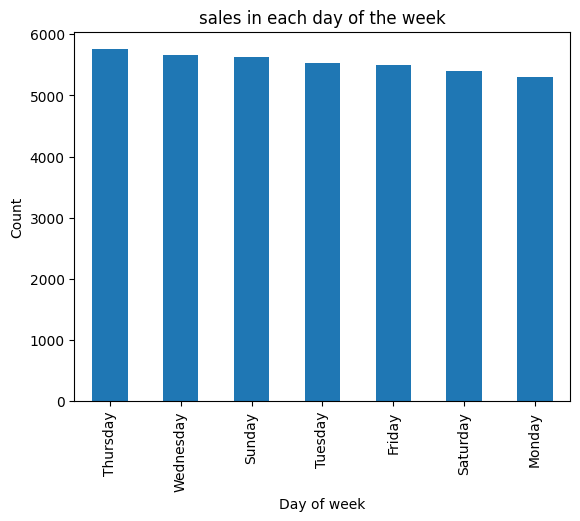

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df["Day of week"].value_counts().plot(kind="bar")
plt.xlabel("Day of week")
plt.ylabel("Count")
plt.title("sales in each day of the week")

Text(0.5, 1.0, 'sales in each month')

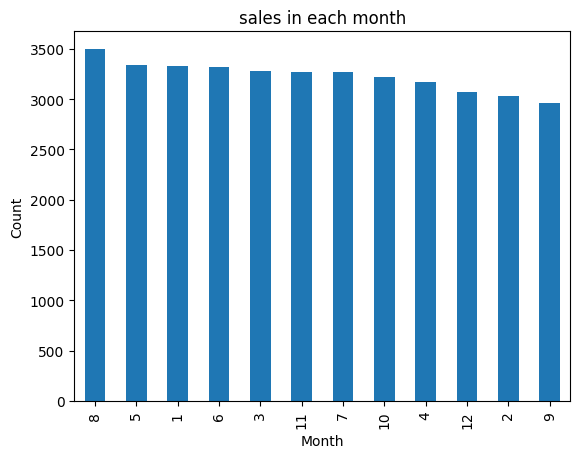

In [ ]:
df["Month"].value_counts().plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("sales in each month")

Text(0.5, 1.0, 'sales in each day')

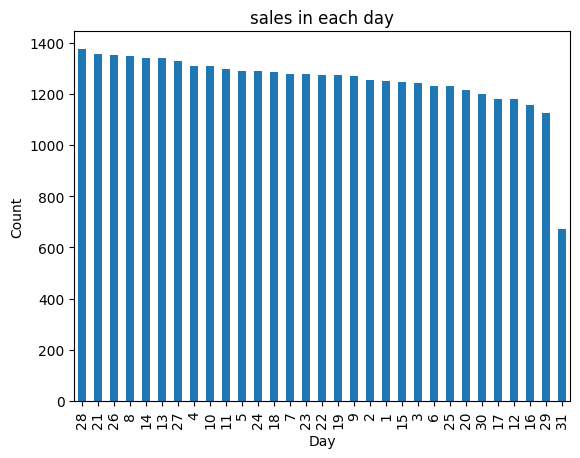

In [ ]:
df["Day"].value_counts().plot(kind="bar")
plt.xlabel("Day")
plt.ylabel("Count")
plt.title("sales in each day")

In [ ]:
w=pd.DataFrame(df.groupby("Date")["itemDescription"].nunique().index)
w["MEmber_count"]=(df.groupby("Date")["Member_number"].nunique().values)
w["item_Count"]=(df.groupby("Date")["itemDescription"].nunique().values)
w["item"]=df.groupby("Date")["itemDescription"].unique().values
w.set_index("Date",inplace=True)
w

,MEmber_count,item_Count,item
Date,,,
2014-01-01,21,30,"[cleaner, sausage, tropical fruit, whole milk,..."
2014-01-02,29,45,"[other vegetables, pip fruit, frankfurter, sug..."
2014-01-03,24,36,"[sausage, meat, sugar, bottled beer, whole mil..."
2014-01-04,28,33,"[frankfurter, pastry, salty snack, bottled bee..."
2014-01-05,20,31,"[sausage, root vegetables, whipped/sour cream,..."
...,...,...,...
2015-12-26,15,26,"[bottled water, herbs, sausage, pip fruit, chi..."
2015-12-27,21,43,"[chicken, frankfurter, other vegetables, tropi..."
2015-12-28,19,37,"[onions, root vegetables, citrus fruit, rolls/..."


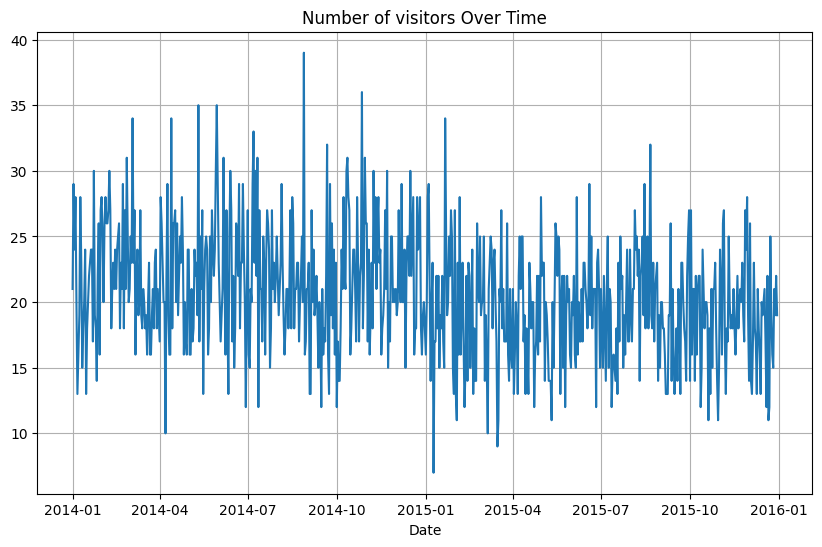

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(w["MEmber_count"])
plt.title('Number of visitors Over Time')
plt.xlabel('Date')
plt.grid(True)


In [ ]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=377de5322ee09c4562b448e0bb556d8c847598031b8e022093e52f47534a9f41
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from apyori import apriori

In [ ]:
m =w["item"].tolist()
m

[array(['cleaner', 'sausage', 'tropical fruit', 'whole milk',
        'citrus fruit', 'onions', 'other vegetables', 'berries',
        'hamburger meat', 'bottled water', 'butter', 'yogurt', 'waffles',
        'soda', 'sliced cheese', 'curd', 'specialty chocolate',
        'shopping bags', 'flower (seeds)', 'coffee', 'whipped/sour cream',
        'frozen potato products', 'candles', 'bottled beer',
        'Instant food products', 'frozen vegetables', 'brown bread',
        'domestic eggs', 'dishes', 'chocolate'], dtype=object),
 array(['other vegetables', 'pip fruit', 'frankfurter', 'sugar',
        'frozen vegetables', 'beef', 'waffles', 'meat', 'root vegetables',
        'pastry', 'butter', 'brown bread', 'ice cream', 'soda',
        'rolls/buns', 'chicken', 'citrus fruit', 'white bread',
        'frozen fish', 'sparkling wine', 'cream cheese ', 'whole milk',
        'tropical fruit', 'fruit/vegetable juice', 'yogurt',
        'condensed milk', 'curd', 'soft cheese', 'canned beer', '

In [ ]:
rules = apriori(m, min_support=0.00030, min_confidence=0.01, min_lift=3,min_length=2,max_length=2)
p=list(rules)


def inspect(p):
  q = (tuple(result[2][0][0])[0] for result in p)
  r = (tuple(result[2][0][1])[0] for result in p)
  Support = (result[1] for result in p)
  Confidence = (result[2][0][2] for result in p)
  Lift=(result[2][0][3] for result in p)
  return list(zip(q,r,Support,Confidence,Lift))


v=pd.DataFrame(inspect(p),columns= ["Item#1","Item#2","Support","Confidence","Lift"])
v


,Item#1,Item#2,Support,Confidence,Lift
0,Instant food products,baby cosmetics,0.002747,0.035088,8.514620
1,Instant food products,bags,0.001374,0.017544,3.192982
2,Instant food products,liqueur,0.004121,0.052632,4.257310
3,abrasive cleaner,cleaner,0.005495,0.181818,4.564263
4,artif. sweetener,baby cosmetics,0.001374,0.035714,8.666667
...,...,...,...,...,...
237,softener,toilet cleaner,0.001374,0.024390,3.551220
238,specialty vegetables,tea,0.002747,0.181818,5.090909
239,spices,toilet cleaner,0.002747,0.051282,7.466667
240,syrup,whisky,0.001374,0.047619,4.333333


In [ ]:
v_sorted = v.sort_values(by='Lift', ascending=False)
v_sorted

,Item#1,Item#2,Support,Confidence,Lift
169,liqueur,preservation products,0.001374,0.111111,80.888889
160,kitchen utensil,prosecco,0.001374,1.000000,38.315789
157,kitchen utensil,male cosmetics,0.001374,1.000000,20.800000
203,preservation products,spices,0.001374,1.000000,18.666667
21,bags,frozen fruits,0.001374,0.250000,16.545455
...,...,...,...,...,...
87,curd cheese,light bulbs,0.006868,0.116279,3.023256
152,house keeping products,specialty vegetables,0.002747,0.045455,3.008264
151,house keeping products,potato products,0.005495,0.090909,3.008264
126,frozen fruits,house keeping products,0.002747,0.181818,3.008264


**Results:**We can observe that in the store, people bought liquer with preservation products, kitchen utensil with prosecco and preservation products with spices. The store should add deals with preservation products, kitchen utensil and frozen chicken to increase it sales.

#From the association rules, write down the necessary strategy to pair up the products to increase the sales:


1.Promotions and Discounts:

Offer promotions or discounts on products that are frequently part of association rules. For example, if customers often buy Product A and Product B together, offer a discount when both products are purchased.

2.Targeted Marketing:

Use the association rules to inform targeted marketing campaigns. If certain products are commonly purchased together, target customers who have bought one product with advertisements or promotions for the associated product.

3.Visual Merchandising:

Arrange products in physical stores or online platforms to highlight associated products. Displaying complementary items together can increase the likelihood of customers buying multiple products.

4.Customer Recommendations:

Implement recommendation systems that suggest associated products during the checkout process or on product pages. This can encourage customers to add complementary items to their cart.